# Contents

1. Import libraries and data
2. Make Subset
3. Line Chart
4. Decompose data's components
5. Dickey-Fuller test
6. Check Autocorrelations

# 1. Import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# make a path to project folder
path = r'C:\Users\egrnw\anaconda3\Achievement 6 Project'

In [3]:
# import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC data EXTRA cleaned.csv'), index_col = False)

In [4]:
df.head(5)

,Unnamed: 0,R_fighter,B_fighter,Referee,date,City,State/Province,Country,Winner,title_bout,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_encoded
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,1
1,1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,1
2,2,Tai Tuivasa,Harry Hunsucker,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,1
3,3,Cheyanne Buys,Montserrat Conejo,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,0
4,4,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,0


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.shape

(6012, 147)

In [7]:
print(df.columns.tolist())

['R_fighter', 'B_fighter', 'Referee', 'date', 'City', 'State/Province', 'Country', 'Winner', 'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_

In [8]:
type(df)

pandas.core.frame.DataFrame

# 2. Make Subset

I am making a subset of the lightweight weight class because it has 1,091 entries between 1997 and 2021. Each individual fighter does not have enough data by themselves to conduct a time series analysis. 

In [9]:
# sort by lightweight class only 

df_lw = df[df["weight_class"].str.contains("Lightweight", case=False, na=False)].copy()

In [10]:
df_lw.shape

(1091, 147)

In [11]:
df_lw.head(10)

,R_fighter,B_fighter,Referee,date,City,State/Province,Country,Winner,title_bout,weight_class,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_encoded
5,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0,0
18,Nasrat Haqparast,Rafa Garcia,Chris Tognoni,3/13/2021,Las Vegas,Nevada,United States of America,Red,False,Lightweight,...,1,0,0,Southpaw,177.80,182.88,155.0,26.0,25.0,1
30,Islam Makhachev,Drew Dober,Chris Tognoni,3/6/2021,Las Vegas,Nevada,United States of America,Red,False,Lightweight,...,1,2,0,Southpaw,177.80,177.80,155.0,32.0,29.0,1
34,Uros Medic,Aalon Cruz,Mark Smith,3/6/2021,Las Vegas,Nevada,United States of America,Red,False,Lightweight,...,0,0,0,Southpaw,185.42,180.34,155.0,31.0,27.0,1
41,Alexander Hernandez,Thiago Moises,Mark Smith,2/27/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,2,0,0,Orthodox,175.26,182.88,155.0,25.0,28.0,0
72,Michael Johnson,Clay Guida,Mark Smith,2/6/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,4,0,0,Southpaw,177.80,185.42,155.0,39.0,34.0,0
74,Diego Ferreira,Beneil Dariush,Chris Tognoni,2/6/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,3,2,0,Orthodox,175.26,187.96,155.0,31.0,36.0,0
81,Dan Hooker,Michael Chandler,Marc Goddard,1/23/2021,Abu Dhabi,Abu Dhabi,United Arab Emirates,Blue,False,Lightweight,...,6,2,0,Switch,182.88,190.50,155.0,34.0,30.0,0
85,Dustin Poirier,Conor McGregor,Herb Dean,1/23/2021,Abu Dhabi,Abu Dhabi,United Arab Emirates,Red,False,Lightweight,...,8,3,0,Southpaw,175.26,182.88,155.0,32.0,32.0,1
87,Arman Tsarukyan,Matt Frevola,Lukasz Bosacki,1/23/2021,Abu Dhabi,Abu Dhabi,United Arab Emirates,Red,False,Lightweight,...,0,0,0,Orthodox,170.18,182.88,155.0,30.0,24.0,1


In [12]:
df_time = df_lw[['date', 'R_avg_SIG_STR_pct']]

<Axes: title={'center': 'Lightweight Division: Avg Significant Strike % Over Time'}, xlabel='date'>

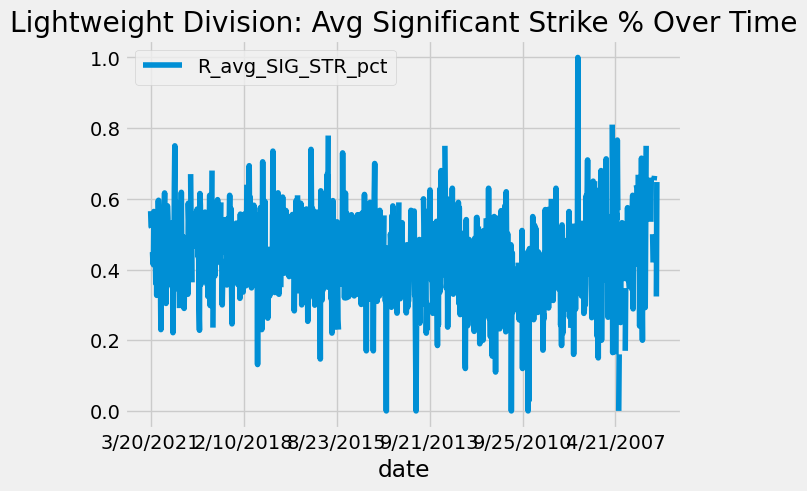

In [13]:
# Plot the data using matplotlib.

df_time.plot(x="date", y="R_avg_SIG_STR_pct", title="Lightweight Division: Avg Significant Strike % Over Time")

In [14]:
df_time['date'] = pd.to_datetime(df_time['date'])

In [15]:
data_sub = df_time.loc[df_time['date'] >= '1997-01-01']

In [16]:
data_sub.shape

(1091, 2)

In [17]:
data_sub = df_time.loc[(df_time['date'] < '2021-12-01')]

In [18]:
data_sub.shape

(1091, 2)

In [19]:
data_sub.head()

,date,R_avg_SIG_STR_pct
5,2021-03-20,0.565156
18,2021-03-13,0.521875
30,2021-03-06,0.518750
34,2021-03-06,NaN
41,2021-02-27,0.449062


In [20]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,R_avg_SIG_STR_pct
datetime,
2021-03-20,0.565156
2021-03-13,0.521875
2021-03-06,0.518750
2021-03-06,NaN
2021-02-27,0.449062


In [21]:
# Check for missing values

data_sub.isnull().sum()

R_avg_SIG_STR_pct    109
dtype: int64

In [22]:
# find median
R_avg_SIG_STR_pct_median = df['R_avg_SIG_STR_pct'].median()

In [23]:
# impute missing values
data_sub.fillna({'R_avg_SIG_STR_pct': R_avg_SIG_STR_pct_median}, inplace=True)

In [24]:
data_sub.shape

(1091, 1)

In [25]:
# Check for missing values

data_sub.isnull().sum()

R_avg_SIG_STR_pct    0
dtype: int64

In [26]:
data_sub.isna().sum()

R_avg_SIG_STR_pct    0
dtype: int64

In [27]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

np.int64(384)

In [28]:
data_sub.shape

(1091, 1)

In [29]:
data_sub.head

<bound method NDFrame.head of             R_avg_SIG_STR_pct
datetime                     
2021-03-20           0.565156
2021-03-13           0.521875
2021-03-06           0.518750
2021-03-06           0.450000
2021-02-27           0.449062
...                       ...
1997-05-30           0.450000
1997-05-30           0.450000
1997-02-07           0.323750
1997-02-07           0.647500
1997-02-07           0.450000

[1091 rows x 1 columns]>

In [30]:
data_sub.isna().sum()

R_avg_SIG_STR_pct    0
dtype: int64

# 3. Line Chart

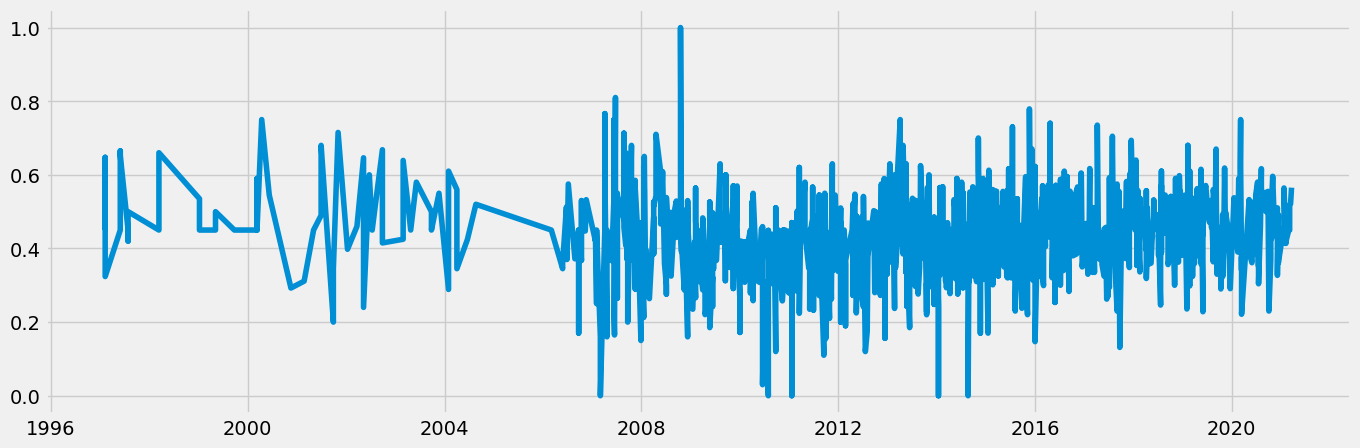

In [31]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

# 4. Decompose data's components

In [32]:
data_sub.isna().sum()

R_avg_SIG_STR_pct    0
dtype: int64

In [33]:
# Example: average per week
data_sub = data_sub.resample('W').mean()

In [34]:
data_sub.isna().sum()

R_avg_SIG_STR_pct    816
dtype: int64

In [35]:
data_sub.head()

,R_avg_SIG_STR_pct
datetime,
1997-02-09,0.47375
1997-02-16,NaN
1997-02-23,NaN
1997-03-02,NaN
1997-03-09,NaN


In [36]:
data_sub.shape

(1259, 1)

In [37]:
# average per week
data_sub_w = data_sub.resample('W').mean()

In [38]:
#  find median
R_avg_SIG_STR_pct_median = data_sub_w['R_avg_SIG_STR_pct'].median()

In [39]:
# impute missing values
data_sub_w.fillna({'R_avg_SIG_STR_pct': R_avg_SIG_STR_pct_median}, inplace=True)

In [40]:
data_sub_w.head()

,R_avg_SIG_STR_pct
datetime,
1997-02-09,0.47375
1997-02-16,0.43725
1997-02-23,0.43725
1997-03-02,0.43725
1997-03-09,0.43725


In [41]:
data_sub_w.shape

(1259, 1)

In [42]:
decomposition = sm.tsa.seasonal_decompose(data_sub_w, model='additive', period=52)

In [43]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

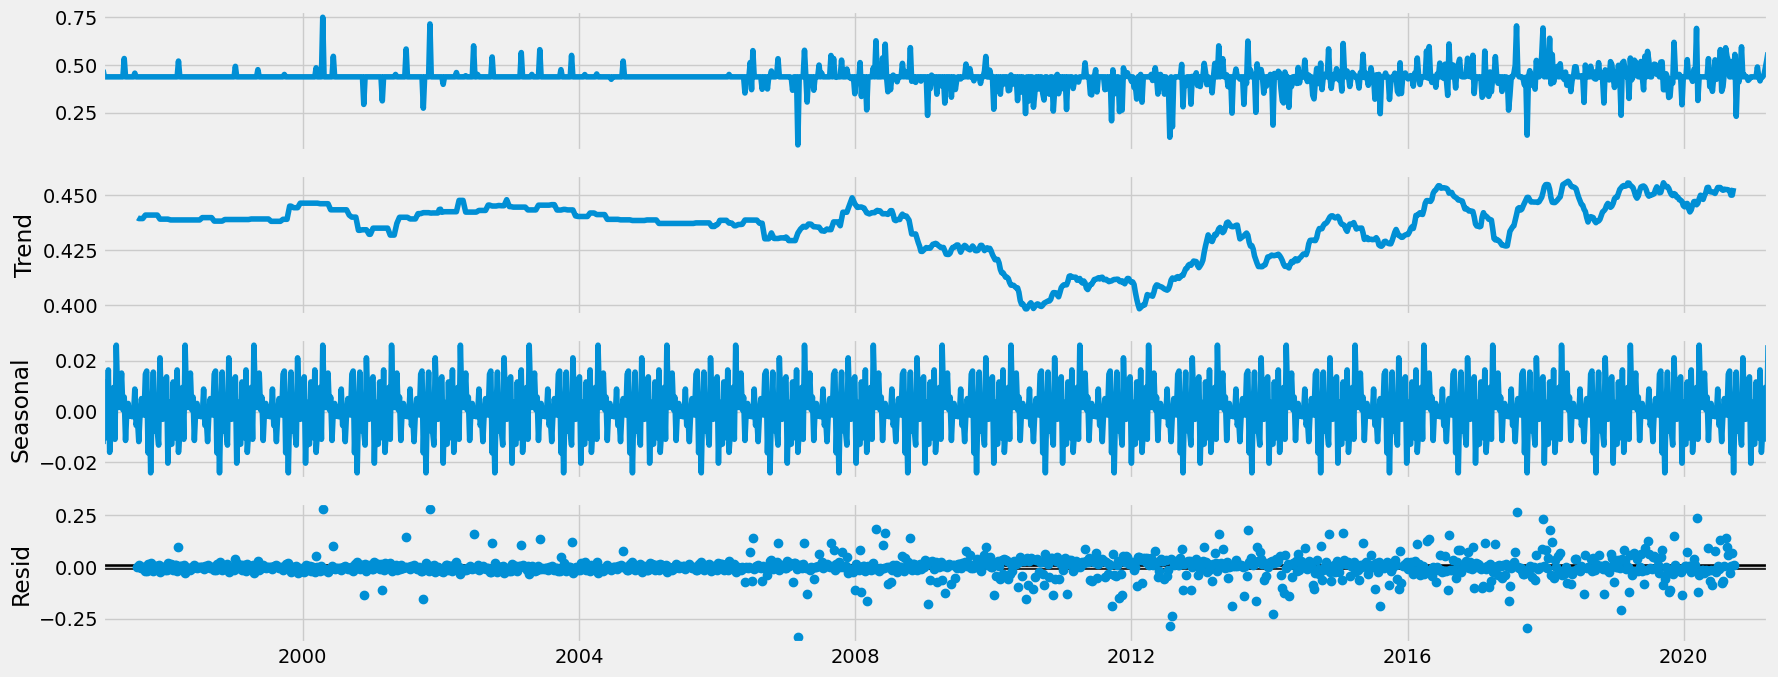

In [44]:
# Plot the separate components

decomposition.plot()
plt.show()

It appears from looking at the trend line that between 2008 and 2012 the number of significant strikes fell. Maybe due to more fighters focusing on grappling? But then the trend goes back up afterward. 

Seasonality looks consistent. Probably because fights are scheduled around the same time each year. 

# 5. Dickey-Fuller test

In [45]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_w['R_avg_SIG_STR_pct'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.052000e+00
p-value                        4.811933e-15
Number of Lags Used            8.000000e+00
Number of Observations Used    1.250000e+03
Critical Value (1%)           -3.435592e+00
Critical Value (5%)           -2.863855e+00
Critical Value (10%)          -2.568003e+00
dtype: float64


null hypothesis: There is a root unit

The test statistic is smaller than the critical values.

The time series does not have a unit root which means that the data is stationary.

# 6. Autocorrelation

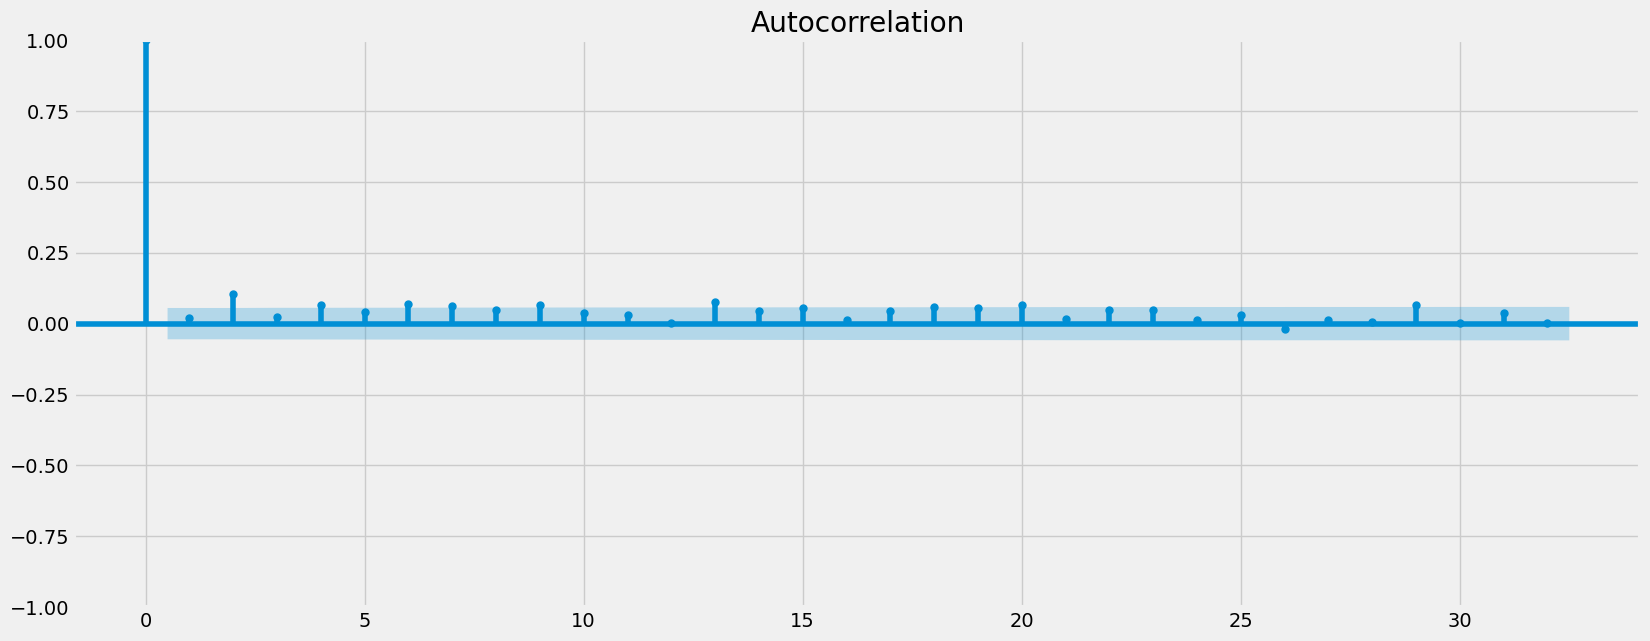

In [47]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub_w['R_avg_SIG_STR_pct'])
plt.show()